In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns

In [2]:
# Load and preprocess the data
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Data/Sentiment140.csv',
                      encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


In [3]:
dataset = dataset[['sentiment', 'text']]
sentiment_counts = dataset['sentiment'].value_counts()
print(sentiment_counts)

0    800000
4    800000
Name: sentiment, dtype: int64


In [4]:
# Map sentiment labels to integers (0: negative, 4: positive)
sentiment_map = {0: 0, 4: 1}  # 0: negative, 1: positive
dataset.loc[:, 'sentiment'] = dataset['sentiment'].map(sentiment_map)


In [5]:
# Preprocess the text data
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in tqdm(textdata, desc="Processing tweets", unit="tweet"):
        tweet = tweet.lower()
        tweet = re.sub(urlPattern, ' URL', tweet)
        tweet = re.sub(userPattern, ' USER', tweet)
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            word = wordLemm.lemmatize(word)
            tweetwords += (word + ' ')
        processedText.append(tweetwords)

    return processedText

processed_text = preprocess(dataset['text'].values)

Processing tweets: 100%|██████████| 1600000/1600000 [05:12<00:00, 5126.70tweet/s]


In [6]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 2), min_df=5, max_df=0.8)

In [7]:
# Vectorize the text data
start_time = time.time()
X_counts = count_vectorizer.fit_transform(tqdm(processed_text, desc="Vectorizing text data", unit="document"))
end_time = time.time()
print(f"Vectorization completed in {end_time - start_time:.2f} seconds")

Vectorizing text data: 100%|██████████| 1600000/1600000 [01:17<00:00, 20680.22document/s]


Vectorization completed in 109.26 seconds


In [8]:
# Split the data
X_train_counts, X_test_counts, y_train, y_test = train_test_split(X_counts, dataset['sentiment'].values, test_size=0.2, random_state=0)


# BernoulliNB

In [9]:
# Define the model evaluation function
def model_Evaluate(model):
    y_pred = model.predict(X_test_counts)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Initialize and train the BernoulliNB model
BNB_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
BNB_model.fit(X_train_counts, y_train)


In [ ]:
# Evaluate the model
model_Evaluate(BNB_model)

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score


In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],    # Smoothing parameter
    'binarize': [0.0, 0.5, 1.0], # Threshold for binarizing features
    'fit_prior': [True, False]   # Whether to learn class prior probabilities
}


In [ ]:
# Initialize the model
bernoulli_nb = BernoulliNB()

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=bernoulli_nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [ ]:
# Fit the grid search
grid_search.fit(X_train_counts, y_train)

# Get the best model parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_counts)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}")


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# # Initialize and train the RandomForestClassifier model with fewer trees
# RF_model = RandomForestClassifier(n_estimators=1, random_state=0, n_jobs=-1)
# RF_model.fit(X_train_counts, y_train)

In [ ]:
# def model_Evaluate(model):
#     y_pred = model.predict(X_test_counts)
#     print("Classification Report:\n", classification_report(y_test, y_pred))
#     print("Accuracy:", accuracy_score(y_test, y_pred))
    
#     # Compute the confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
    
#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

In [ ]:
# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5)
# }

# # Setup Randomized Search with cross-validation
# random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0, n_jobs=-1), 
#                                    param_distributions=param_dist, 
#                                    n_iter=20,  # number of parameter settings that are sampled
#                                    cv=5, 
#                                    scoring='accuracy', 
#                                    n_jobs=-1, 
#                                    verbose=2,
#                                    random_state=0)

# # Fit the random search
# random_search.fit(X_train_counts, y_train)

# # Get the best model parameters and accuracy
# best_params = random_search.best_params_
# best_accuracy = random_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Accuracy: {best_accuracy:.2f}")

# # Evaluate the best model on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test_counts)

# test_accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# roc_auc = roc_auc_score(y_test, y_pred)
# balanced_acc = balanced_accuracy_score(y_test, y_pred)

# print(f"Test Accuracy: {test_accuracy:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print(f"ROC AUC: {roc_auc:.2f}")
# print(f"Balanced Accuracy: {balanced_acc:.2f}")

# # Final evaluation of the best model
# model_Evaluate(best_model)

# ETC

In [ ]:
# # Initialize and train the ExtraTreesClassifier model
# ETC_model = ExtraTreesClassifier(random_state=0)
# ETC_model.fit(X_train_counts, y_train)

In [ ]:
# # Evaluate the model
# model_Evaluate(ETC_model)

# Nearest Centroids

In [10]:
from sklearn.neighbors import NearestCentroid

In [11]:
# Initialize and train the NearestCentroid model
NC_model = NearestCentroid()
NC_model.fit(X_train_counts, y_train)

NearestCentroid()

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60    159815
           1       0.60      0.55      0.57    160185

    accuracy                           0.59    320000
   macro avg       0.59      0.59      0.59    320000
weighted avg       0.59      0.59      0.59    320000

Accuracy: 0.588403125


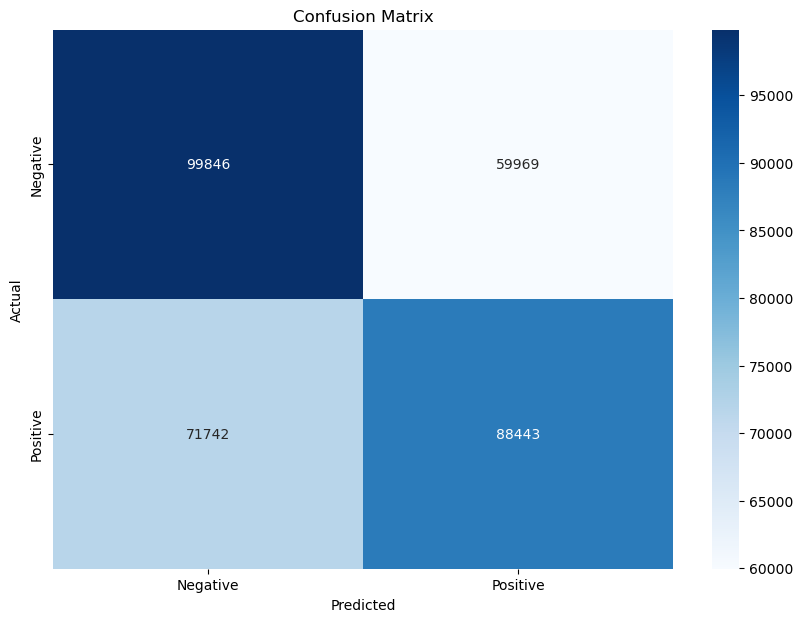

In [12]:
# Evaluate the model
model_Evaluate(NC_model)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Anaconda\Lib\site-packages\sklearn\neighbors\_nearest_centroid.py", line 139, in fit
    raise ValueError("threshold shrinking not supported for sp

Best Parameters: {'metric': 'euclidean', 'shrink_threshold': None}
Best Accuracy: 0.59
Test Accuracy: 0.59
F1 Score: 0.59
ROC AUC: 0.59
Balanced Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60    159815
           1       0.60      0.55      0.57    160185

    accuracy                           0.59    320000
   macro avg       0.59      0.59      0.59    320000
weighted avg       0.59      0.59      0.59    320000

Accuracy: 0.588403125


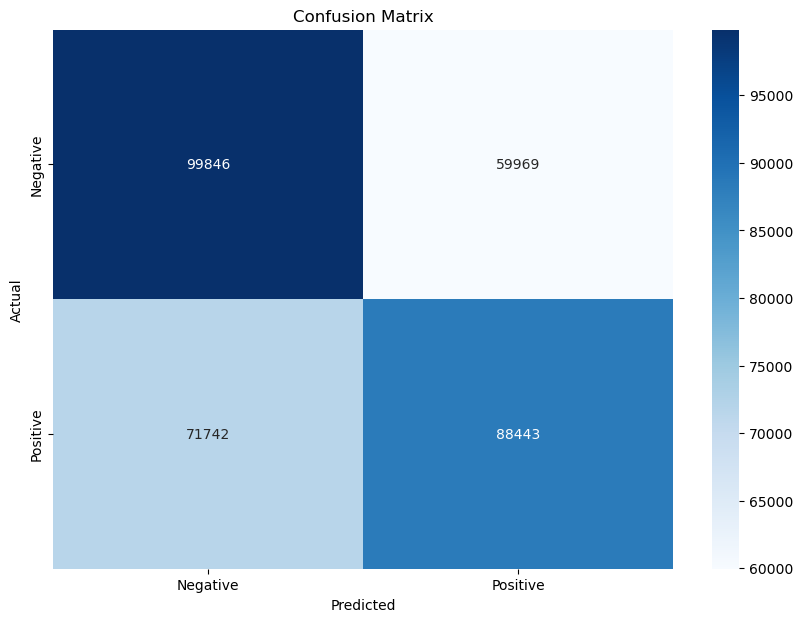

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'metric': ['euclidean', 'manhattan'],
    'shrink_threshold': [None, 0.1, 0.5, 1.0]
}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=NearestCentroid(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train_counts, y_train)

# Get the best model parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_counts)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Final evaluation of the best model
model_Evaluate(best_model)

# SVC

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78    159815
           1       0.77      0.81      0.79    160185

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Accuracy: 0.783046875


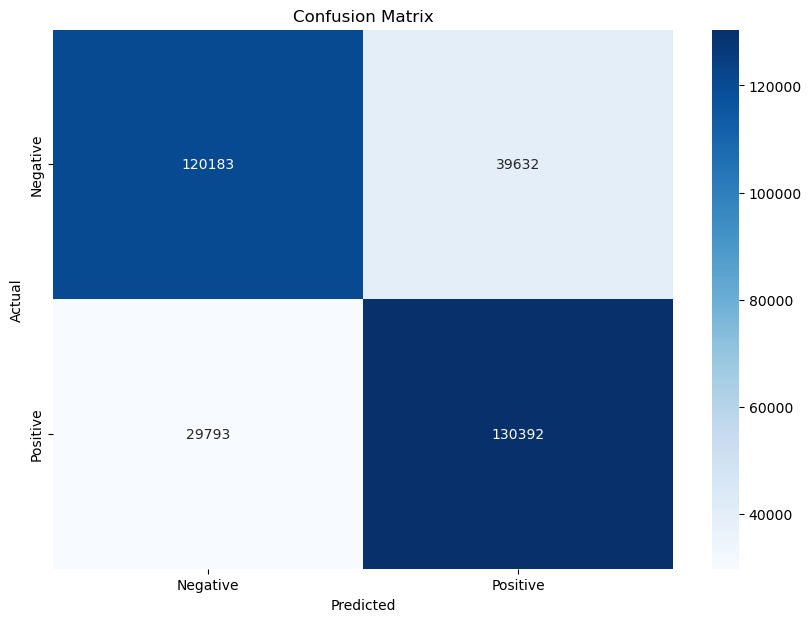

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'loss': 'squared_hinge'}
Best Accuracy: 0.78
Test Accuracy: 0.78
F1 Score: 0.78
ROC AUC: 0.78
Balanced Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78    159815
           1       0.77      0.81      0.79    160185

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Accuracy: 0.78333125


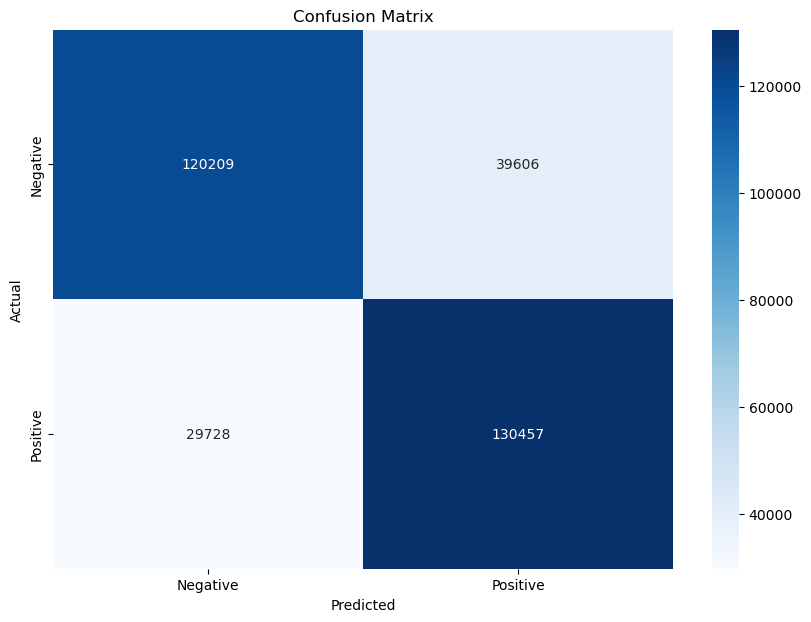

In [19]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Keep X_train_counts and X_test_counts as sparse matrices

# Initialize and train the LinearSVC model
SVC_model = LinearSVC(random_state=0, max_iter=1000)
SVC_model.fit(X_train_counts, y_train)

# Modify the evaluation function to use sparse matrices
def model_Evaluate(model):
    y_pred = model.predict(X_test_counts)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the initial model
model_Evaluate(SVC_model)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced']
}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=LinearSVC(random_state=0, max_iter=1000), 
                           param_grid=param_grid, 
                           cv=3,  # Reduced from 5 to 3 to speed up the process
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train_counts, y_train)

# Get the best model parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_counts)

test_accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Final evaluation of the best model
model_Evaluate(best_model)